In [4]:
import pandas as pd
import os
import numpy as np

In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [6]:
!ls "/content/drive/MyDrive/NIH_XRAY"


Data_Entry_2017.csv.zip  images_001.zip  resnet1_model.h5
densenet_model.h5	 images_002.zip


In [7]:
!unzip "/content/drive/MyDrive/NIH_XRAY/images_001.zip" -d /content/nih_dataset/
!unzip "/content/drive/MyDrive/NIH_XRAY/images_002.zip" -d /content/nih_dataset/



Streaming output truncated to the last 5000 lines.
  inflating: /content/nih_dataset/images/00002587_004.png  
  inflating: /content/nih_dataset/images/00002587_005.png  
  inflating: /content/nih_dataset/images/00002588_000.png  
  inflating: /content/nih_dataset/images/00002589_000.png  
  inflating: /content/nih_dataset/images/00002589_001.png  
  inflating: /content/nih_dataset/images/00002589_002.png  
  inflating: /content/nih_dataset/images/00002589_003.png  
  inflating: /content/nih_dataset/images/00002589_004.png  
  inflating: /content/nih_dataset/images/00002589_005.png  
  inflating: /content/nih_dataset/images/00002589_006.png  
  inflating: /content/nih_dataset/images/00002589_007.png  
  inflating: /content/nih_dataset/images/00002590_000.png  
  inflating: /content/nih_dataset/images/00002591_000.png  
  inflating: /content/nih_dataset/images/00002592_000.png  
  inflating: /content/nih_dataset/images/00002592_001.png  
  inflating: /content/nih_dataset/images/00002592

In [8]:
!unzip "/content/drive/MyDrive/NIH_XRAY/Data_Entry_2017.csv.zip" -d /content/nih_dataset/

Archive:  /content/drive/MyDrive/NIH_XRAY/Data_Entry_2017.csv.zip
  inflating: /content/nih_dataset/Data_Entry_2017.csv  


In [9]:

df = pd.read_csv("/content/nih_dataset/Data_Entry_2017.csv")
img_dir = "/content/nih_dataset/images"
all_images = set(os.listdir(img_dir))
subset_df = df[df['Image Index'].isin(all_images)]
print("Total matched images:", len(subset_df))

subset_df.to_csv("/content/nih_dataset/subset_15000.csv", index=False)


Total matched images: 14999


In [10]:
subset_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,00003923_009.png,Effusion|Infiltration,9,3923,28,M,AP,2500,2048,0.171,0.171,NaN
14995,00003923_010.png,Effusion|Infiltration,10,3923,28,M,AP,2500,2048,0.171,0.171,NaN
14996,00003923_011.png,Infiltration,11,3923,28,M,AP,2500,2048,0.171,0.171,NaN
14997,00003923_012.png,No Finding,12,3923,28,M,AP,2500,2048,0.171,0.171,NaN


In [11]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14999 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Image Index                  14999 non-null  object 
 1   Finding Labels               14999 non-null  object 
 2   Follow-up #                  14999 non-null  int64  
 3   Patient ID                   14999 non-null  int64  
 4   Patient Age                  14999 non-null  int64  
 5   Patient Gender               14999 non-null  object 
 6   View Position                14999 non-null  object 
 7   OriginalImage[Width          14999 non-null  int64  
 8   Height]                      14999 non-null  int64  
 9   OriginalImagePixelSpacing[x  14999 non-null  float64
 10  y]                           14999 non-null  float64
 11  Unnamed: 11                  0 non-null      float64
dtypes: float64(3), int64(5), object(4)
memory usage: 1.5+ MB


In [12]:
clean_df=subset_df.drop(["Follow-up #","OriginalImage[Width","Height]","OriginalImagePixelSpacing[x","y]","Unnamed: 11","Patient ID"],axis="columns")

In [13]:
clean_df

,Image Index,Finding Labels,Patient Age,Patient Gender,View Position
0,00000001_000.png,Cardiomegaly,58,M,PA
1,00000001_001.png,Cardiomegaly|Emphysema,58,M,PA
2,00000001_002.png,Cardiomegaly|Effusion,58,M,PA
3,00000002_000.png,No Finding,81,M,PA
4,00000003_000.png,Hernia,81,F,PA
...,...,...,...,...,...
14994,00003923_009.png,Effusion|Infiltration,28,M,AP
14995,00003923_010.png,Effusion|Infiltration,28,M,AP
14996,00003923_011.png,Infiltration,28,M,AP
14997,00003923_012.png,No Finding,28,M,AP


In [14]:
clean_df.replace({"M":1, "F":0, "PA":1, "AP":0}, inplace=True)

/tmp/ipython-input-60550438.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_df.replace({"M":1, "F":0, "PA":1, "AP":0}, inplace=True)


In [15]:
clean_df

,Image Index,Finding Labels,Patient Age,Patient Gender,View Position
0,00000001_000.png,Cardiomegaly,58,1,1
1,00000001_001.png,Cardiomegaly|Emphysema,58,1,1
2,00000001_002.png,Cardiomegaly|Effusion,58,1,1
3,00000002_000.png,No Finding,81,1,1
4,00000003_000.png,Hernia,81,0,1
...,...,...,...,...,...
14994,00003923_009.png,Effusion|Infiltration,28,1,0
14995,00003923_010.png,Effusion|Infiltration,28,1,0
14996,00003923_011.png,Infiltration,28,1,0
14997,00003923_012.png,No Finding,28,1,0


In [16]:
all_labels = sorted(set(l for sublist in clean_df['Finding Labels'].str.split('|') for l in sublist))
print("All labels:", all_labels)
for label in all_labels:
    clean_df[label] = clean_df['Finding Labels'].apply(lambda x: 1 if label in x.split('|') else 0)
clean_df = clean_df.drop(columns=['Finding Labels'])


All labels: ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [17]:

clean_df

,Image Index,Patient Age,Patient Gender,View Position,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,58,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,58,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,58,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,81,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,00000003_000.png,81,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,00003923_009.png,28,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
14995,00003923_010.png,28,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
14996,00003923_011.png,28,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
14997,00003923_012.png,28,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [20]:
tabular_features = ['Patient Age', 'Patient Gender', 'View Position']
label_cols = clean_df.columns[4:]
img_dir = "/content/nih_dataset/images"

In [21]:
train_df, temp_df = train_test_split(clean_df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [22]:
scaler = MinMaxScaler()
train_tab = scaler.fit_transform(train_df[tabular_features])
val_tab = scaler.transform(val_df[tabular_features])
test_tab = scaler.transform(test_df[tabular_features])


In [23]:
y_train = train_df[label_cols].values
y_val = val_df[label_cols].values
y_test = test_df[label_cols].values


In [24]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
IMG_SIZE = (224, 224)
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def load_images(df_subset):
    images = []
    for fname in df_subset['Image Index']:
        img_path = os.path.join(img_dir, fname)
        img = load_img(img_path, target_size=IMG_SIZE)
        img = img_to_array(img) / 255.0
        images.append(img)
    return np.array(images)


In [ ]:
#X_train_img = load_images(train_df)
#X_val_img = load_images(val_df)
#X_test_img = load_images(test_df)

In [26]:
train_paths = [os.path.join(img_dir, fname) for fname in train_df['Image Index']]
val_paths   = [os.path.join(img_dir, fname) for fname in val_df['Image Index']]
test_paths  = [os.path.join(img_dir, fname) for fname in test_df['Image Index']]

In [27]:
def process_image(filename, label, tab_features):
    img = tf.io.read_file(filename)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.resize(img, IMG_SIZE)
    img = img / 255.0

    return ({"image_input": img, "tab_input": tab_features}, label)

In [28]:
BATCH_SIZE=32

In [29]:

train_ds = tf.data.Dataset.from_tensor_slices((train_paths, y_train, train_tab))
train_ds = train_ds.map(process_image, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


val_ds = tf.data.Dataset.from_tensor_slices((val_paths, y_val, val_tab))
val_ds = val_ds.map(process_image, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((test_paths, y_test, test_tab))
test_ds = test_ds.map(process_image, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [32]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import tensorflow as tf

# **Model Training Part 1**

In [33]:


# --- Parameters ---
IMG_SHAPE = (224, 224, 3)
NUM_CLASSES = y_train.shape[1]  # same as DenseNet
TAB_FEATURES = train_tab.shape[1]

# --- Image input ---
image_input = Input(shape=IMG_SHAPE, name="image_input")
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=image_input)
base_model.trainable = False  # Freeze base initially
x = GlobalAveragePooling2D()(base_model.output)

# --- Tabular input ---
tab_input = Input(shape=(TAB_FEATURES,), name="tab_input")

# --- Combine image + tabular ---
combined = Concatenate()([x, tab_input])
combined = Dense(256, activation='relu')(combined)
combined = Dropout(0.3)(combined)
output = Dense(NUM_CLASSES, activation='sigmoid')(combined)

# --- Build model ---
model = Model(inputs=[image_input, tab_input], outputs=output)

# --- Compile model ---
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(multi_label=True)]
)

model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ image_input[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,116,879 (92.00 MB)

 Trainable params: 529,167 (2.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [34]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = {}
for i, label in enumerate(label_cols):
    weights = compute_class_weight(class_weight='balanced',
                                   classes=np.array([0, 1]),
                                   y=y_train[:, i])
    class_weights[i] = dict(enumerate(weights))

print(class_weights)


{0: {0: np.float64(0.5492035884291468), 1: np.float64(5.580930232558139)}, 1: {0: np.float64(0.5134799726121191), 1: np.float64(19.046031746031748)}, 2: {0: np.float64(0.519752230789223), 1: np.float64(13.156798245614034)}, 3: {0: np.float64(0.5065861690450055), 1: np.float64(38.458333333333336)}, 4: {0: np.float64(0.5507665473239696), 1: np.float64(5.424502712477396)}, 5: {0: np.float64(0.511422726110306), 1: np.float64(22.386194029850746)}, 6: {0: np.float64(0.5126901384378739), 1: np.float64(20.2003367003367)}, 7: {0: np.float64(0.5015465641197124), 1: np.float64(162.14864864864865)}, 8: {0: np.float64(0.5877253134796239), 1: np.float64(3.3498045784477943)}, 9: {0: np.float64(0.5166637960730279), 1: np.float64(15.502583979328165)}, 10: {0: np.float64(1.2039935781657636), 1: np.float64(0.8551168757126568)}, 11: {0: np.float64(0.5232882686436983), 1: np.float64(11.235018726591761)}, 12: {0: np.float64(0.516263660614405), 1: np.float64(15.871693121693122)}, 13: {0: np.float64(0.5060307

In [35]:
for layer in base_model.layers[-50:]: # Unfreezing more layers
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-6), # Reduced learning rate
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(multi_label=True)]
)

In [ ]:
EPOCHS_FINE = 10
history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_FINE
)


In [1]:
model.save("/content/drive/MyDrive/NIH_XRAY/resnet1_model.h5")

NameError: name 'model' is not defined

In [36]:

model.load_weights('/content/drive/MyDrive/NIH_XRAY/resnet1_model.h5')


In [37]:

image_input = Input(shape=(224,224,3), name="image_input")
base_model = tf.keras.applications.ResNet50(weights="imagenet", include_top=False, input_tensor=image_input)
x = GlobalAveragePooling2D()(base_model.output)

tab_input = Input(shape=(train_tab.shape[1],), name="tab_input")
combined = Concatenate()([x, tab_input])
combined = Dense(256, activation="relu")(combined)
combined = Dropout(0.5)(combined)
output = Dense(NUM_CLASSES, activation="sigmoid")(combined)
model = Model(inputs=[image_input, tab_input], outputs=output)
model.load_weights('/content/drive/MyDrive/NIH_XRAY/resnet1_model.h5')


In [38]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(multi_label=True)]
)



In [39]:
history= model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    initial_epoch=20
)

Epoch 21/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 299s 596ms/step - accuracy: 0.5573 - auc_2: 0.5590 - loss: 0.2471 - val_accuracy: 0.5847 - val_auc_2: 0.5148 - val_loss: 0.2495
Epoch 22/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 181s 451ms/step - accuracy: 0.5711 - auc_2: 0.6753 - loss: 0.1946 - val_accuracy: 0.4747 - val_auc_2: 0.5673 - val_loss: 0.2116
Epoch 23/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 183s 457ms/step - accuracy: 0.5893 - auc_2: 0.7505 - loss: 0.1767 - val_accuracy: 0.5353 - val_auc_2: 0.5832 - val_loss: 0.2210
Epoch 24/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 198s 443ms/step - accuracy: 0.6136 - auc_2: 0.8231 - loss: 0.1568 - val_accuracy: 0.5340 - val_auc_2: 0.5857 - val_loss: 0.2151
Epoch 25/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 181s 451ms/step - accuracy: 0.6537 - auc_2: 0.8672 - loss: 0.1351 - val_accuracy: 0.5573 - val_auc_2: 0.6569 - val_loss: 0.2089
Epoch 26/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 200s 447ms/step - accuracy: 0.6907 - auc_2: 0.8961 - loss: 0.1198 - val_accuracy: 0.5433 - val_auc_2: 0.6578 - val

In [40]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-6),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(multi_label=True)])


In [41]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [42]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=40,
    initial_epoch=30,
    callbacks=[early_stopping]
)

Epoch 31/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 287s 579ms/step - accuracy: 0.8092 - auc_3: 0.9567 - loss: 0.0782 - val_accuracy: 0.5047 - val_auc_3: 0.6833 - val_loss: 0.2395
Epoch 32/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 184s 459ms/step - accuracy: 0.8195 - auc_3: 0.9588 - loss: 0.0707 - val_accuracy: 0.5260 - val_auc_3: 0.6817 - val_loss: 0.2466
Epoch 33/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 181s 451ms/step - accuracy: 0.8316 - auc_3: 0.9640 - loss: 0.0665 - val_accuracy: 0.5087 - val_auc_3: 0.6630 - val_loss: 0.2549
Epoch 34/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 200s 447ms/step - accuracy: 0.8409 - auc_3: 0.9717 - loss: 0.0622 - val_accuracy: 0.5367 - val_auc_3: 0.6755 - val_loss: 0.2541
Epoch 35/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 182s 454ms/step - accuracy: 0.8571 - auc_3: 0.9764 - loss: 0.0575 - val_accuracy: 0.5380 - val_auc_3: 0.6789 - val_loss: 0.2539
Epoch 36/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 192s 480ms/step - accuracy: 0.8548 - auc_3: 0.9766 - loss: 0.0541 - val_accuracy: 0.5220 - val_auc_3: 0.6752 - val

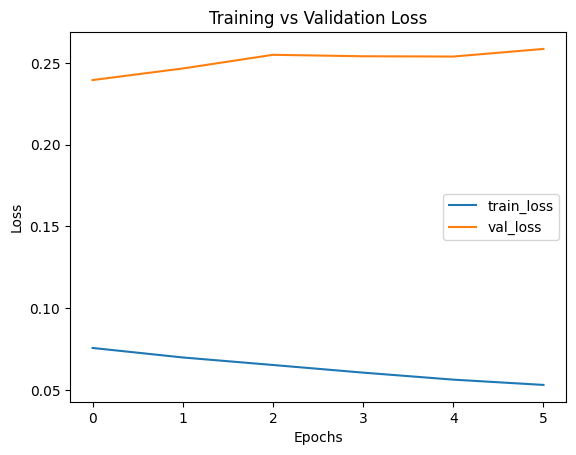

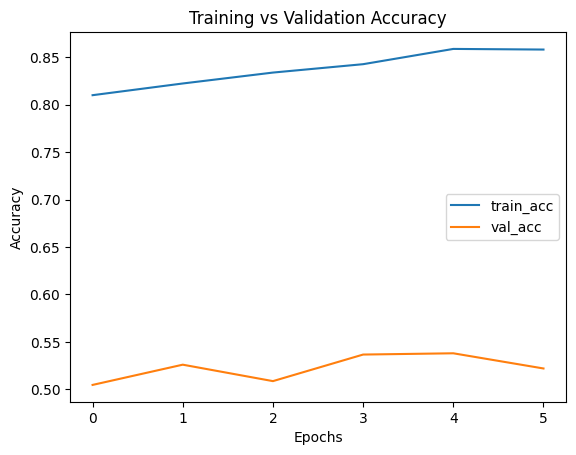

In [43]:
import matplotlib.pyplot as plt

# Plot Loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

# Plot AUC if you tracked it
if 'auc' in history.history:
    plt.plot(history.history['auc'], label='train_auc')
    plt.plot(history.history['val_auc'], label='val_auc')
    plt.xlabel('Epochs')
    plt.ylabel('AUC')
    plt.legend()
    plt.title("Training vs Validation AUC")
    plt.show()

# Plot Accuracy if you tracked it
if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], label='train_acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title("Training vs Validation Accuracy")
    plt.show()


In [44]:
from sklearn.metrics import accuracy_score, roc_auc_score

y_train_pred = model.predict(train_ds)
y_val_pred   = model.predict(val_ds)
y_test_pred  = model.predict(test_ds)

y_train_bin = (y_train_pred >= 0.5).astype(int)
y_val_bin   = (y_val_pred >= 0.5).astype(int)
y_test_bin  = (y_test_pred >= 0.5).astype(int)

print("Train Accuracy:", accuracy_score(y_train.flatten(), y_train_bin.flatten()))
print("Val Accuracy:", accuracy_score(y_val.flatten(), y_val_bin.flatten()))
print("Test Accuracy:", accuracy_score(y_test.flatten(), y_test_bin.flatten()))

print("\nTrain AUC:", roc_auc_score(y_train, y_train_pred, average="macro"))
print("Val AUC:", roc_auc_score(y_val, y_val_pred, average="macro"))
print("Test AUC:", roc_auc_score(y_test, y_test_pred, average="macro"))


375/375 ━━━━━━━━━━━━━━━━━━━━ 172s 412ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 448ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 423ms/step
Train Accuracy: 0.9108314581770703
Val Accuracy: 0.9325777777777777
Test Accuracy: 0.9282666666666667

Train AUC: 0.4964869521025521
Val AUC: 0.7027771597258939
Test AUC: 0.68308766513802


In [45]:
label_list = label_cols.tolist()

auc_scores = {label: roc_auc_score(y_test[:, i], y_test_pred[:, i])
              for i, label in enumerate(label_list)}

import pandas as pd
auc_df = pd.DataFrame(list(auc_scores.items()), columns=["Disease", "AUC Score"])
print(auc_df)


               Disease  AUC Score
0          Atelectasis   0.714457
1         Cardiomegaly   0.749819
2        Consolidation   0.683460
3                Edema   0.781024
4             Effusion   0.796706
5            Emphysema   0.721661
6             Fibrosis   0.667690
7               Hernia   0.689824
8         Infiltration   0.638456
9                 Mass   0.674483
10          No Finding   0.674289
11              Nodule   0.561345
12  Pleural_Thickening   0.611664
13           Pneumonia   0.506770
14        Pneumothorax   0.774666


In [46]:
from sklearn.metrics import classification_report

print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_bin,
                            target_names=label_list, zero_division=0))



Classification Report (Test Data):
                    precision    recall  f1-score   support

       Atelectasis       0.24      0.09      0.13       131
      Cardiomegaly       0.00      0.00      0.00        31
     Consolidation       0.00      0.00      0.00        55
             Edema       0.00      0.00      0.00        24
          Effusion       0.53      0.23      0.32       132
         Emphysema       0.00      0.00      0.00        28
          Fibrosis       0.00      0.00      0.00        45
            Hernia       0.00      0.00      0.00         3
      Infiltration       0.26      0.13      0.17       242
              Mass       0.00      0.00      0.00        50
        No Finding       0.71      0.54      0.61       862
            Nodule       0.00      0.00      0.00        79
Pleural_Thickening       0.00      0.00      0.00        39
         Pneumonia       0.00      0.00      0.00        19
      Pneumothorax       0.00      0.00      0.00        65

  

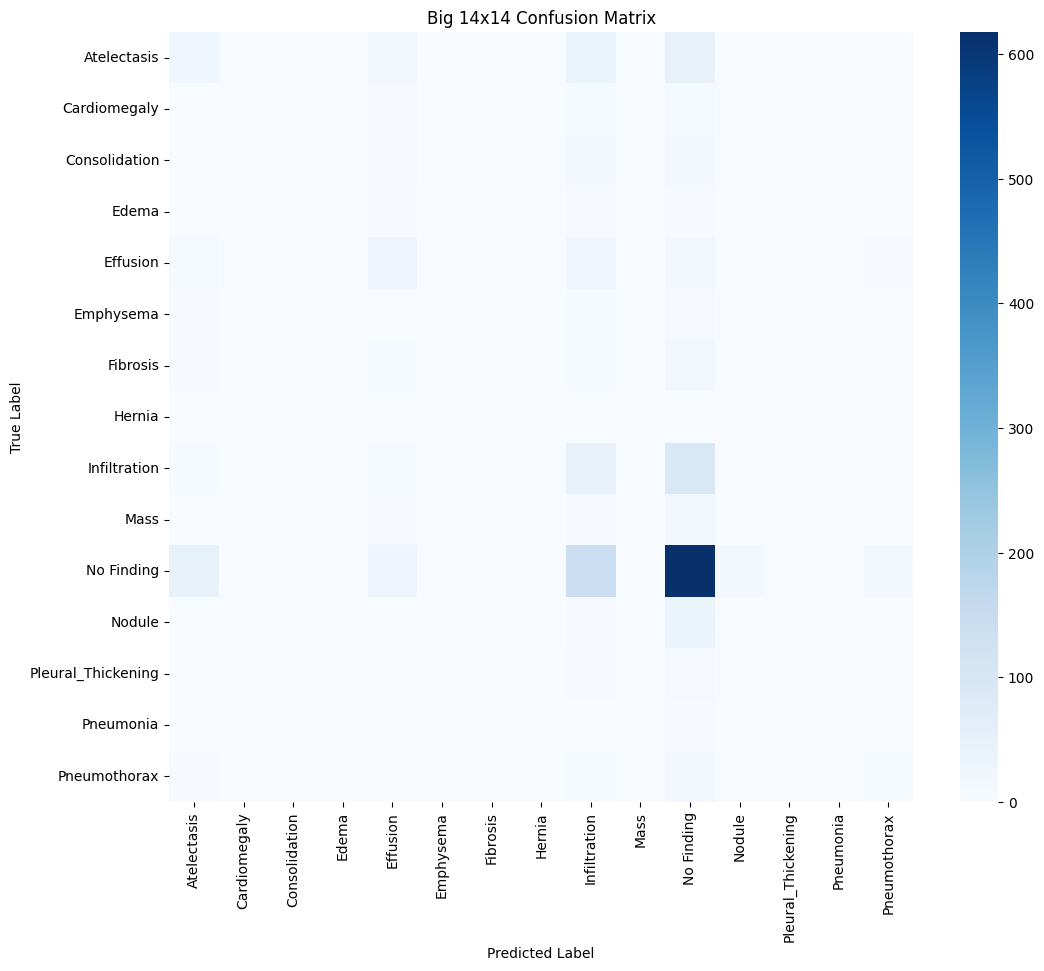

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_test_single = np.argmax(y_test, axis=1)
y_pred_single = np.argmax(y_test_pred, axis=1)

cm_big = confusion_matrix(y_test_single, y_pred_single)

plt.figure(figsize=(12, 10))
sns.heatmap(cm_big, annot=False, cmap="Blues", xticklabels=label_list, yticklabels=label_list)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Big 14x14 Confusion Matrix")
plt.show()


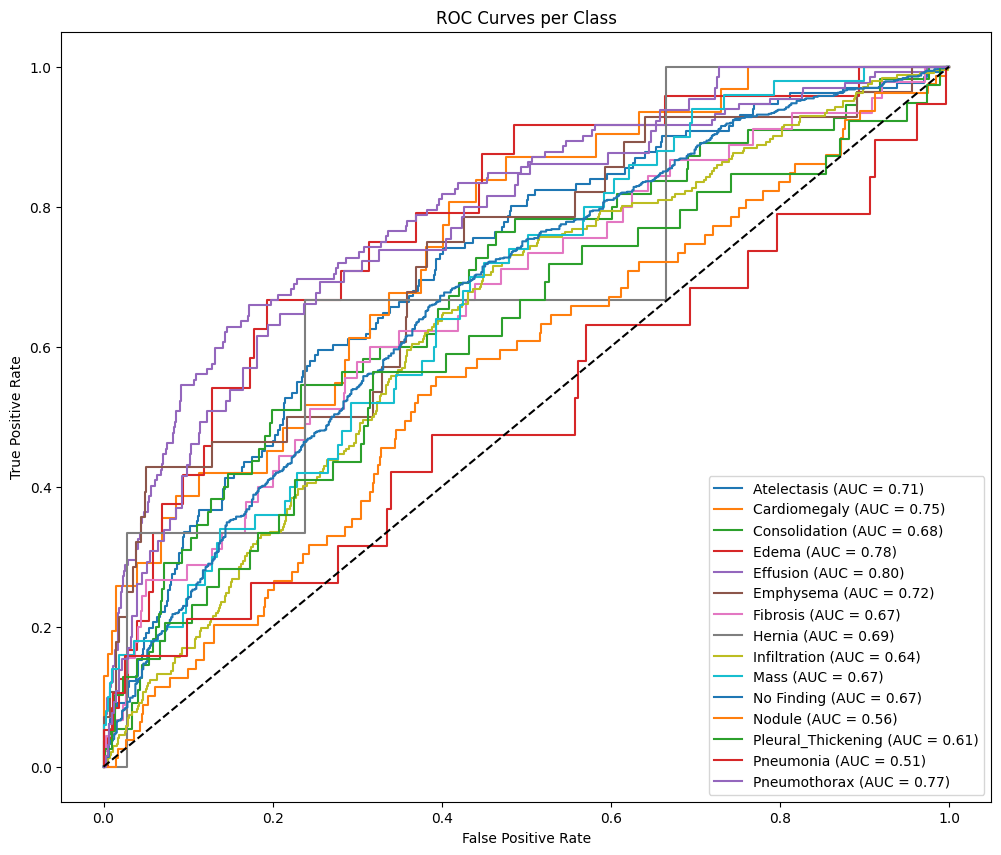

In [48]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(12, 10))

for i, label in enumerate(label_list):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_test_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves per Class")
plt.legend()
plt.show()


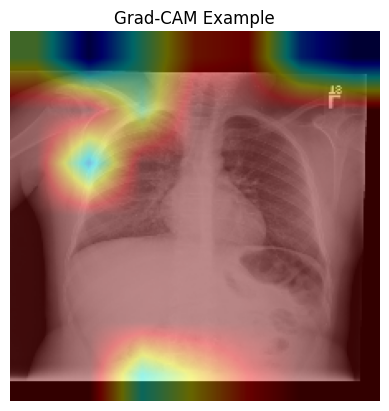

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Model
import cv2
import numpy as np
import matplotlib.pyplot as plt

def make_gradcam_heatmap(img_array_dict, model, last_conv_layer_name="conv5_block3_out"):
    grad_model = Model(inputs=model.inputs, outputs=[model.get_layer(last_conv_layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array_dict)
        loss = predictions[:, 0]


    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

sample_batch = next(iter(test_ds.take(1)))

sample_inputs_dict, sample_label = sample_batch
sample_img = sample_inputs_dict["image_input"][0].numpy()
sample_input_dict = ({'image_input': sample_inputs_dict["image_input"][0][tf.newaxis, ...],
                 'tab_input': sample_inputs_dict["tab_input"][0][tf.newaxis, ...]})


heatmap = make_gradcam_heatmap(sample_input_dict, model)

heatmap = cv2.resize(heatmap, (sample_img.shape[1], sample_img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(np.uint8(sample_img*255), 0.6, heatmap, 0.4, 0)

plt.imshow(superimposed_img)
plt.title("Grad-CAM Example")
plt.axis("off")
plt.show()

In [50]:
print("Macro AUC:", roc_auc_score(y_test, y_test_pred, average="macro"))
print("Micro AUC:", roc_auc_score(y_test, y_test_pred, average="micro"))


Macro AUC: 0.68308766513802
Micro AUC: 0.8428452949746985
